<a href="https://colab.research.google.com/github/Rohithhh16/plant_classification/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# New Section

In [2]:
from tensorflow.keras import models,layers

In [3]:
import matplotlib.pyplot as plt

In [22]:
img_size = 256
batch_size = 32
channel = 3
Epoches = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/PlantVillage",
    shuffle=True,
    image_size=(img_size,img_size),
    batch_size = batch_size)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
for i_b,l_b in dataset.take(1):
    print(i_b.shape)
    print(l_b)

(32, 256, 256, 3)
tf.Tensor([0 1 2 0 1 2 0 0 0 0 0 1 2 0 1 2 0 2 0 0 0 2 1 1 0 1 0 0 1 0 0 1], shape=(32,), dtype=int32)


### so we have 32 batches of images with the shape of 256,256,3
### And those label 0,1,2 are our class names

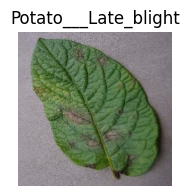

In [9]:
plt.figure(figsize=(2,2))
for i_b,l_b in dataset.take(1):
    plt.title(class_names[l_b[0]])
    plt.imshow(i_b[0].numpy().astype("uint8"))
    plt.axis("off")

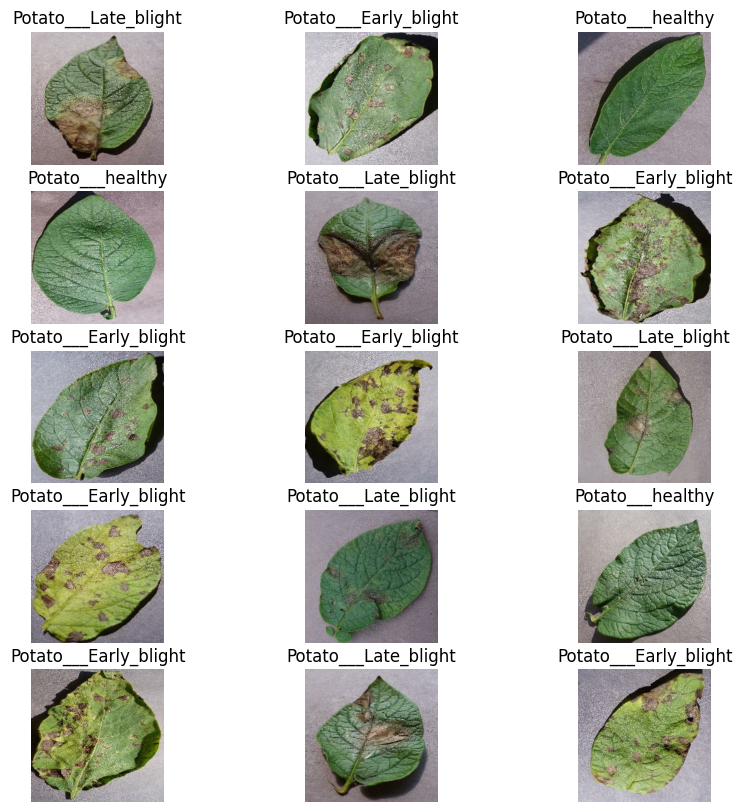

In [10]:
plt.figure(figsize=(10,10))
for i_b,l_b in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(5,3,i+1)
        plt.title(class_names[l_b[i]])
        plt.imshow(i_b[i].numpy().astype("uint8"))
        plt.axis("off")

## Spliting Dataset for testing,training and validation

In [11]:
def train_test_val_split(df,tr_s=0.8,ts_s=0.1,val_s=0.1,shuffle=True,shuffle_size = 1000):
    d_s = len(df)
    train_size = int(tr_s*d_s)
    test_size = int(ts_s*d_s)

    train_ds = df.take(train_size)
    val_ds = df.skip(train_size).take(test_size)
    test_ds = df.skip(train_size).skip(test_size)

    return train_ds,val_ds,test_ds

In [12]:
train_dataset,validation_dataset,testing_dataset = train_test_val_split(dataset)

In [13]:
len(train_dataset)

54

In [14]:
len(validation_dataset)

6

In [15]:
len(testing_dataset)

8

In [16]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_dataset = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## pipeline creation for resize and rescale and data augentaion

In [17]:
resize_recall = tf.keras.Sequential(
    [layers.Resizing(img_size,img_size),
     layers.Rescaling(1.0/255)]
)

In [18]:
data_augmentation = tf.keras.Sequential(
    [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])

In [19]:
input_shape = (batch_size,img_size,img_size,channel)
n_classes = 3
model = models.Sequential([
    resize_recall,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",
                  data_format= "channels_last"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [24]:
hist = model.fit(
    train_dataset,
    epochs=Epoches,
    batch_size=batch_size,
    verbose=1,
    validation_data=validation_dataset
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.4070 - loss: 0.9752 - val_accuracy: 0.4375 - val_loss: 0.8978
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5527 - loss: 0.8299 - val_accuracy: 0.7188 - val_loss: 0.7442
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7513 - loss: 0.5915 - val_accuracy: 0.7760 - val_loss: 0.5389
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.7887 - loss: 0.4912 - val_accuracy: 0.8281 - val_loss: 0.4344
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8484 - loss: 0.3835 - val_accuracy: 0.8125 - val_loss: 0.4221
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8729 - loss: 0.3054 - val_accuracy: 0.8438 - val_loss: 0.3642
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9042 - loss: 0.2499 - val_accuracy: 0.8646 - val_loss: 0.3172
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8880 - loss: 0.2863 - val_accuracy: 0.8594 - 

In [25]:
scores = model.evaluate(testing_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9928 - loss: 0.0356


In [26]:
scores

[0.042280007153749466, 0.9913793206214905]

In [27]:
hist.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [28]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
def prediction_fun(model,img):
    import numpy as np
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


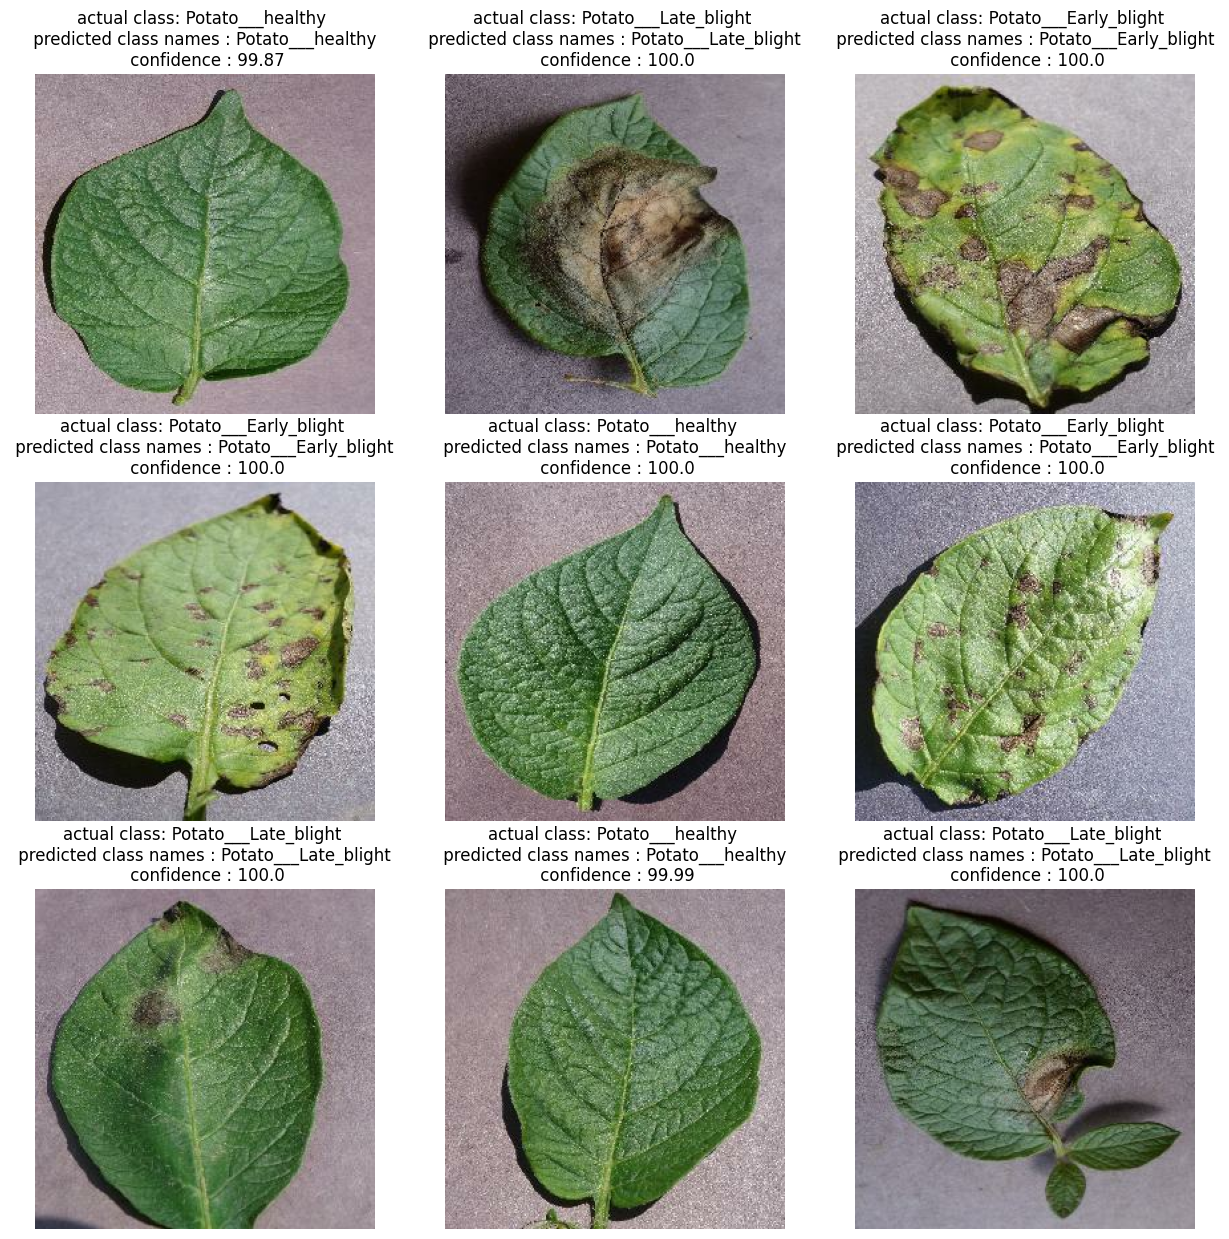

In [30]:
plt.figure(figsize=(15,15))
for images,labels in testing_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)

        predict_class,p_confidence=prediction_fun(model,images[i].numpy())

        plt.title(f"actual class: {class_names[labels[i]]} \n predicted class names : {predict_class} \n confidence : {p_confidence}")

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [31]:
model.export(f"./content/PlantVillage/saved_models{1}")

Saved artifact at './content/PlantVillage/saved_models1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139410346952080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346953040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346954384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346955536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346954768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346954960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346957264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346956112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346956688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139410346958224: TensorSpec(shape=(), dtype=tf.resource, name=No

In [41]:
for a,b in dataset.take(1):
  for i in range(3):
    print(class_names[b[i]])
    img_array = tf.expand_dims(a[i].numpy(), axis=0)  # Add batch dimension
    print(class_names[np.argmax(model.predict(img_array))])

Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Potato___Late_blight
Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Potato___Early_blight
Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Potato___Late_blight


In [40]:
import numpy as np